In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow==2.12.0 opencv-python mediapipe scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.12.0

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python -m pip install pip==23.3.2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

!pip install tensorflow==2.12.0 tensorflow-gpu==2.10.1 
!pip install opencv-python==4.7.0.72
!pip install mediapipe==0.10.18
!pip install scikit-learn==1.2.2
!pip install matplotlib==3.7.1
print("Done")


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.12.0

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.2.2.tar.gz (7.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\swedi\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\swedi\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\swedi\AppData\Roaming\Python\Python312\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 149, in prepare_metadata_for_build_wheel
      return hook(metadata_directory, config_settings)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\swedi\AppData\Local\Temp\pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.7.1.tar.gz (38.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build matplotlib
Done


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [576 lines of output]
  C:\Users\swedi\AppData\Local\Temp\pip-build-env-tbnnb7vz\overlay\Lib\site-packages\setuptools\dist.py:697: SetuptoolsDeprecationWarning: The namespace_packages parameter is deprecated.
  !!
  
          ********************************************************************************
          Please replace its usage with implicit namespaces (PEP 420).
  
          See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages for details.
          ********************************************************************************
  
  !!
    ep.load()(self, ep.name, value)
  WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
  Traceback (most recent call last):
    File "C:\Users\swedi\AppData\Local\Temp\pip-build-env-tbnnb7vz\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py

In [ ]:
!pip uninstall mediapipe
!pip install mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
# def draw_landmarks(image, results):
#     # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_landmarks(image, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS
        )

In [7]:
def draw_styled_landmarks(image, results):
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,  # Use pose connections
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),  # Pose landmark dots
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)  # Pose connections
        )

In [8]:
cap = cv2.VideoCapture(0)

# Set MediaPipe Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        if not ret:
            print("Ignoring empty frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, pose)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    # lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose])

In [13]:
result_test = extract_keypoints(results)

In [14]:
result_test.shape


(132,)

In [15]:
len(results.pose_landmarks.landmark)

33

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 4.86387670e-01,  4.85354722e-01, -6.05818868e-01,  9.99992967e-01,
        5.05982220e-01,  4.24683571e-01, -5.47217071e-01,  9.99986172e-01,
        5.22431493e-01,  4.22133535e-01, -5.46976924e-01,  9.99986351e-01,
        5.34377933e-01,  4.20806408e-01, -5.46731412e-01,  9.99987006e-01,
        4.55431163e-01,  4.36262757e-01, -5.46847820e-01,  9.99983907e-01,
        4.37964439e-01,  4.40494984e-01, -5.45757771e-01,  9.99980330e-01,
        4.22991365e-01,  4.45016205e-01, -5.45972228e-01,  9.99979138e-01,
        5.56359649e-01,  4.49194372e-01, -2.40989164e-01,  9.99988377e-01,
        4.07669634e-01,  4.80668515e-01, -2.21409291e-01,  9.99987543e-01,
        5.22837102e-01,  5.44528663e-01, -4.98044968e-01,  9.99986112e-01,
        4.60004896e-01,  5.53964794e-01, -4.92905945e-01,  9.99984324e-01,
        7.14736104e-01,  7.74524927e-01, -1.15876995e-01,  9.99780834e-01,
        3.04555565e-01,  8.17405105e-01, -9.90956873e-02,  9.98269677e-01,
        9.67652798e-01,  

In [64]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array([
    # 'Yes',
    # 'No',
    # 'Understand',
    # 'Don\'t Understand',
    # 'Please',
    # 'Thank you',
    # 'What',
    'Name',
    # 'Again',
    # 'How',
    'I or Me',
    # 'Fine',
    # 'Busy',
    # 'Sad',
    # 'Happy',
    # 'Same here',
    # 'Good',
    # 'Morning',
    # 'Afternoon',
    # 'Evening',
    'Hello',
    'Goodbye',
    'Nothing',
    # 'See',
    # 'Later',
    # 'Nice',
    # 'Meet',
    # 'You'
])


# Thirty videos worth of data
no_sequences = 20

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [65]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [32]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(no_sequences):
#             # Loop through video length aka sequence length
#             action_path = os.path.join(DATA_PATH, action, str(sequence))
#             os.makedirs(action_path, exist_ok=True)
            
#             # Initialize video writer
#             fourcc = cv2.VideoWriter_fourcc(*'mp4v')
#             out = cv2.VideoWriter(os.path.join(action_path, 'video.mp4'), fourcc, 20.0, (640, 480))
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 out.write(image)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
#             out.release()      
#     cap.release()
#     cv2.destroyAllWindows()

In [66]:
cap = cv2.VideoCapture(0)

# Set MediaPipe Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    # Loop through actions
    for action in actions:
        # Wait for 's' key press to start recording the next action
        while True:
            ret, frame = cap.read()
            cv2.putText(frame, 'Press "s" to start recording {}'.format(action), (10, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            if cv2.waitKey(10) & 0xFF == ord('s'):
                break

        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Create directory for the sequence
            action_path = os.path.join(DATA_PATH, action, str(sequence))
            os.makedirs(action_path, exist_ok=True)
            
            # Initialize video writer
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(os.path.join(action_path, 'video.mp4'), fourcc, 20.0, (640, 480))
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Read feed
                ret, frame = cap.read()

                if not ret:
                    print("Ignoring empty frame.")
                    break

                # Make detections
                image, results = mediapipe_detection(frame, pose)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Write the frame to the video
                out.write(image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            out.release()      
    cap.release()
    cv2.destroyAllWindows()

In [67]:
cap.release()
cv2.destroyAllWindows()

In [68]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [69]:
label_map = {label:num for num, label in enumerate(actions)}

In [70]:
label_map

{'Name': 0, 'I or Me': 1, 'Hello': 2, 'Goodbye': 3, 'Nothing': 4}

In [71]:
len(label_map)

5

In [72]:
actions.shape[0]

5

In [73]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [74]:
np.array(sequences).shape

(100, 30, 132)

In [75]:
np.array(labels).shape

(100,)

In [76]:
X = np.array(sequences)

In [77]:
X.shape

(100, 30, 132)

In [78]:
y = to_categorical(labels).astype(int)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [80]:
print(X_train.shape)

(95, 30, 132)


In [81]:
y_test.shape

(5, 5)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [83]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [84]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [85]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [86]:
# model.fit(X_train, y_train, validation_split=0.2, epochs=500, callbacks=[early_stopping])

In [87]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 46ms/step - loss: 1.6096 - categorical_accuracy: 0.2000
Epoch 2/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.5902 - categorical_accuracy: 0.2000
Epoch 3/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.5047 - categorical_accuracy: 0.2000
Epoch 4/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.4501 - categorical_accuracy: 0.2947
Epoch 5/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.7054 - categorical_accuracy: 0.1895
Epoch 6/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.6078 - categorical_accuracy: 0.2421
Epoch 7/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.5761 - categorical_accuracy: 0.2105
Epoch 8/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.5466 - categorical_accuracy: 0.2105
Epoch 9/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.4311 - categorical_accuracy: 0.2105
E

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            50432     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 205,061
Trainable params: 205,061
Non-tr

In [90]:
res = model.predict(X_test)

1/1 [==============================] - 0s 277ms/step


In [91]:
actions[np.argmax(res[0])]

'Goodbye'

In [92]:
actions[np.argmax(y_test[0])]

'I or Me'

In [93]:
model.save('action(3).h5')

In [94]:
from tensorflow.keras.models import load_model

In [51]:
# model = load_model('action(3).h5')

In [95]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [96]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [97]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [98]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [2, 0]],

       [[2, 2],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [99]:
accuracy_score(ytrue, yhat)

0.6

In [100]:
from scipy import stats

In [101]:
import cv2
import numpy as np

colors = [
    (123, 45, 200),    # Purple
    (87, 210, 34),     # Green
    (20, 150, 90),     # Dark Green
    (245, 16, 117),    # Pink
    (255, 165, 0),     # Orange
    (0, 0, 255),       # Blue
    (255, 255, 0),     # Yellow
    (255, 0, 0),       # Red
    (0, 255, 255),     # Cyan
    (128, 0, 128),     # Dark Purple
    (255, 192, 203)    # Light Pink
]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    # Check if res is a 2D array (multiple samples)
    if len(res.shape) == 2:
        for sample_idx in range(res.shape[0]):  # Iterate over each sample
            for num, prob in enumerate(res[sample_idx]):  # Iterate over each class probability
                # Ensure the index is within the bounds of the colors list
                if num < len(colors):
                    # Convert prob to an integer for drawing the rectangle
                    prob_int = int(prob * 100)
                    cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
                    cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        # If res is a 1D array (single sample)
        for num, prob in enumerate(res):
            # Ensure the index is within the bounds of the colors list
            if num < len(colors):
                # Convert prob to an integer for drawing the rectangle
                prob_int = int(prob * 100)
                cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
                cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    
    return output_frame

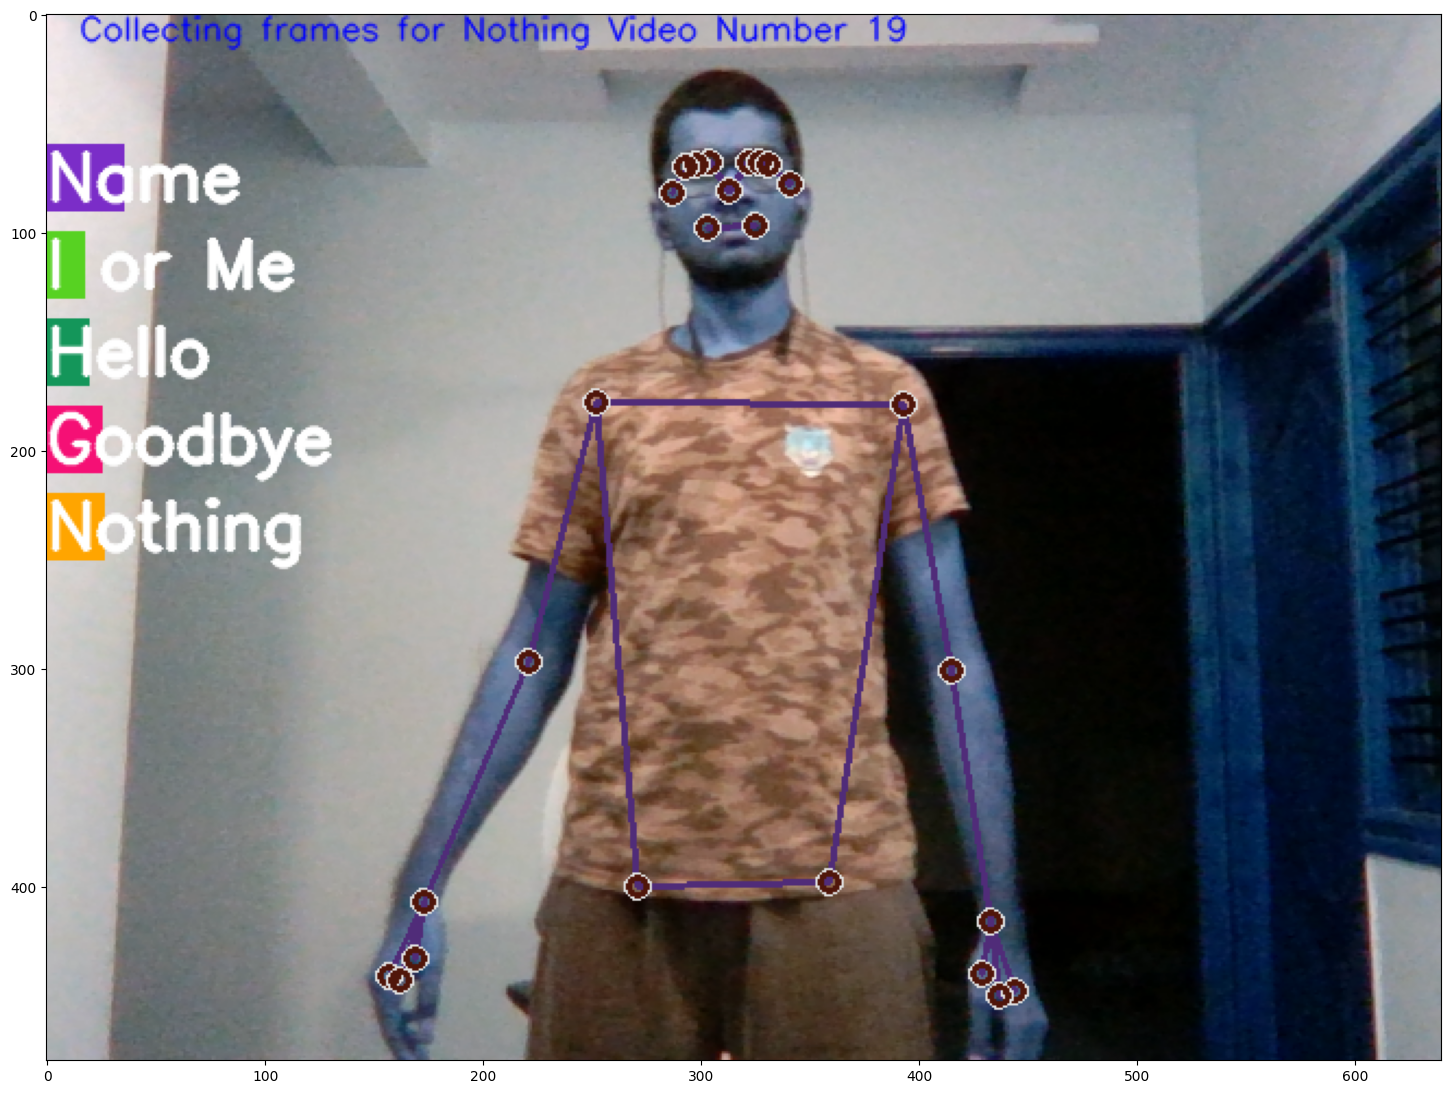

In [102]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [104]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)  # Reduced font size to 0.7
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [62]:
model.save('action(4).h5')